In [19]:
import gensim
from gensim import corpora
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/8d5338c8-35e7-4932-8e08-
[nltk_data]     5cb83f3976ab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df = pd.read_csv('clean_titles-3.csv')
df.head()

,title,link,date,source,country,language,translated_title,number_of_characters_title,number_of_words_title,day_of_week,...,source_type,final_redirected_URL,domain_of_URL,subdomain_of_URL,URL_depth,top_level_domain,url_length,author,cleaned_title,dominant_topic
0,Kann künstliche Intelligenz Smalltalk ersetzen...,https://news.google.com/rss/articles/CBMiY2h0d...,2023-11-12,Blick,US,de,Can artificial intelligence replace small talk...,47,8,Sunday,...,News Outlet,https://www.blick.ch/schweiz/linguistik-profes...,www.blick.ch,www,2,ch,99,[],Can artificial intelligence replace small talk?,"(2, 0.7984908)"
1,Lidé se snadněji svěří chatbotům. Emocionální ...,https://news.google.com/rss/articles/CBMidmh0d...,2023-11-12,iDNES.cz,US,cs,People trust chatbots more easily. Emotional A...,72,13,Sunday,...,Other,https://www.idnes.cz/zpravy/domaci/ai-umela-in...,www.idnes.cz,www,3,cz,118,['Autor'],People trust chatbots more easily. Emotional A...,"(4, 0.57000524)"
2,¿Cómo implementar la IA en el comercio online?...,https://news.google.com/rss/articles/CBMicmh0d...,2023-11-12,RRHH Digital,US,es,How to implement AI in online commerce? - Digi...,43,10,Sunday,...,News Outlet,https://www.rrhhdigital.com/secciones/tecnolog...,www.rrhhdigital.com,www,5,com,114,[],How to implement AI in online commerce?,"(2, 0.30003065)"
3,"Kontrolle von KI: Vorsicht, KI! | ZEIT ONLINE ...",https://news.google.com/rss/articles/CBMiXWh0d...,2023-11-12,ZEIT ONLINE English,US,de,"Controlling AI: Be careful, AI! | ZEIT ONLINE ...",56,12,Sunday,...,Other,https://www.zeit.de/zeit-wissen/2023/06/kuenst...,www.zeit.de,www,4,de,93,[],"Controlling AI: Be careful, AI! | ZEIT ONLINE","(0, 0.83883363)"
4,Los consejos para ganar la lotería de la Intel...,https://news.google.com/rss/articles/CBMiXWh0d...,2023-11-12,C5N,US,es,Tips to win the Artificial Intelligence lotter...,45,9,Sunday,...,Other,https://www.c5n.com/sociedad/los-consejos-gana...,www.c5n.com,www,2,com,93,[],Tips to win the Artificial Intelligence lottery,"(3, 0.54555273)"


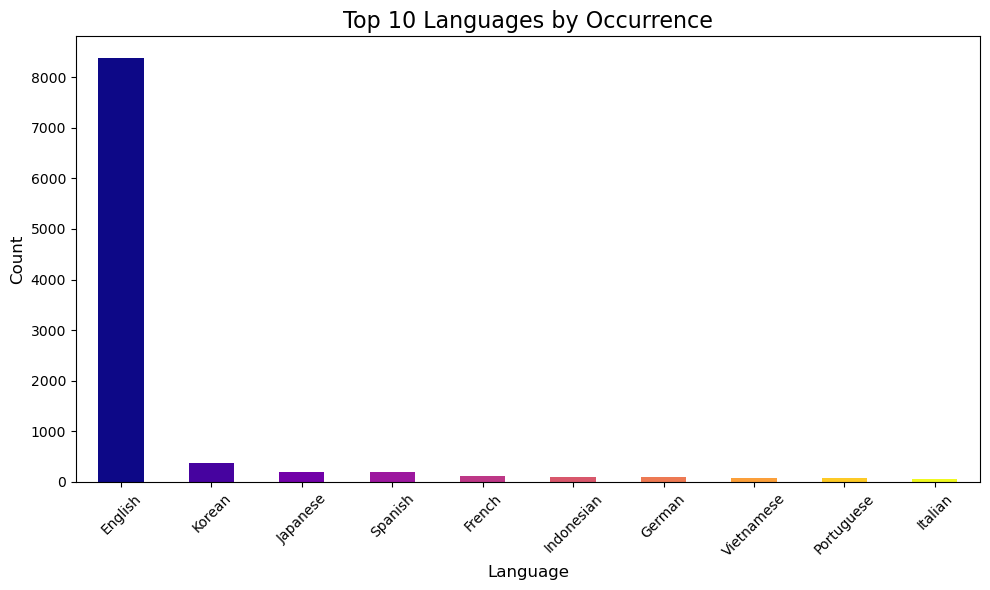

In [46]:
# Top 10 Languages by Occurrence

language_counts = df['language'].value_counts()
top_10 = language_counts.head(10)

#Assigning Colors to Top 10 languages 
colors = plt.cm.plasma(np.linspace(0, 1, len(top_10)))
plt.figure(figsize=(10, 6))
top_10.plot(kind='bar', color=colors)

#Generating Plot 
plt.title('Top 10 Languages by Occurrence', fontsize=16)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Count', fontsize=12)
tick_labels = ['English', 'Korean', 'Japanese', 'Spanish', 'French', 'Indonesian', 'German', 'Vietnamese', 'Portuguese', 'Italian']
plt.xticks(range(len(tick_labels)), tick_labels, rotation=45)
plt.subplots_adjust(bottom=0.3)
plt.savefig('top_10_languages.jpg')
plt.tight_layout()
plt.show()

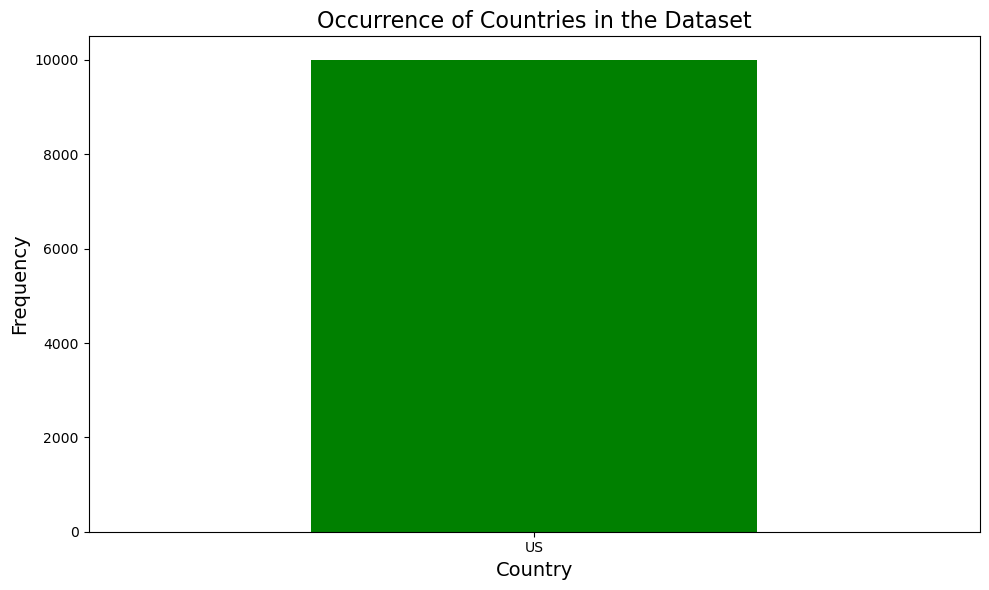

In [83]:
country_counts = df['country'].value_counts()

plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='green')

plt.title('Occurrence of Countries in the Dataset', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

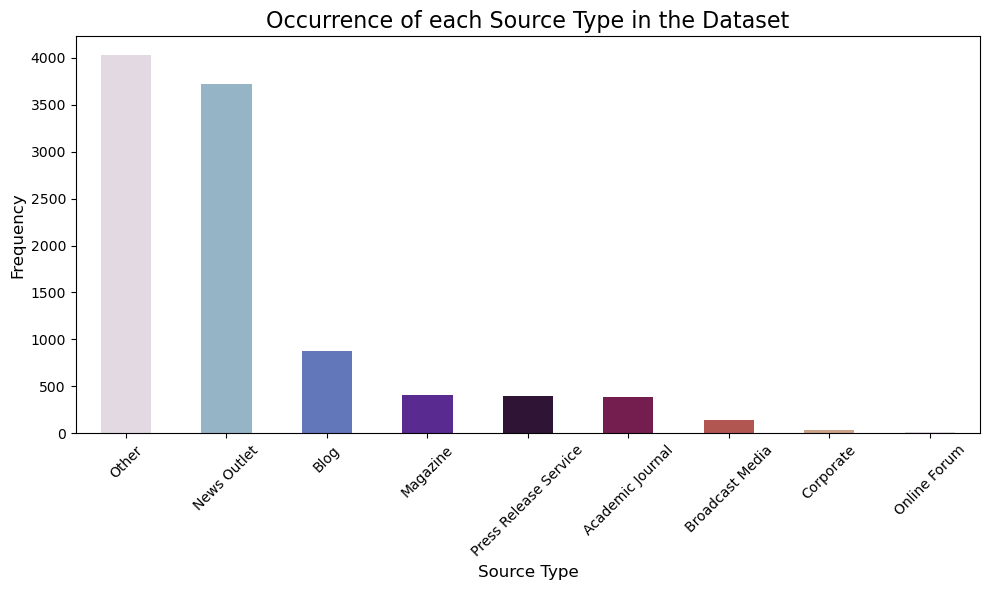

In [62]:
source_type = df['source_type'].value_counts()
colors = plt.cm.twilight(np.linspace(0, 1, len(source_type)))
plt.figure(figsize=(10, 6))
source_type.plot(kind='bar', color=colors)
plt.title('Occurrence of each Source Type in the Dataset', fontsize=16)
plt.xlabel('Source Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [48]:
db = pd.read_csv('Dataset_10k.csv')
db.head()

,title,link,date,source,country,language,translated_title,number_of_characters_title,number_of_words_title,day_of_week,...,is_weekend,is_holiday,source_type,final_redirected_URL,domain_of_URL,subdomain_of_URL,URL_depth,top_level_domain,url_length,author
0,Kann künstliche Intelligenz Smalltalk ersetzen...,https://news.google.com/rss/articles/CBMiY2h0d...,2023-11-12,Blick,US,de,Can artificial intelligence replace small talk...,47,8,Sunday,...,True,False,News Outlet,https://www.blick.ch/schweiz/linguistik-profes...,www.blick.ch,www,2,ch,99,[]
1,Lidé se snadněji svěří chatbotům. Emocionální ...,https://news.google.com/rss/articles/CBMidmh0d...,2023-11-12,iDNES.cz,US,cs,People trust chatbots more easily. Emotional A...,72,13,Sunday,...,True,False,Other,https://www.idnes.cz/zpravy/domaci/ai-umela-in...,www.idnes.cz,www,3,cz,118,['Autor']
2,¿Cómo implementar la IA en el comercio online?...,https://news.google.com/rss/articles/CBMicmh0d...,2023-11-12,RRHH Digital,US,es,How to implement AI in online commerce? - Digi...,43,10,Sunday,...,True,False,News Outlet,https://www.rrhhdigital.com/secciones/tecnolog...,www.rrhhdigital.com,www,5,com,114,[]
3,"Kontrolle von KI: Vorsicht, KI! | ZEIT ONLINE ...",https://news.google.com/rss/articles/CBMiXWh0d...,2023-11-12,ZEIT ONLINE English,US,de,"Controlling AI: Be careful, AI! | ZEIT ONLINE ...",56,12,Sunday,...,True,False,Other,https://www.zeit.de/zeit-wissen/2023/06/kuenst...,www.zeit.de,www,4,de,93,[]
4,Los consejos para ganar la lotería de la Intel...,https://news.google.com/rss/articles/CBMiXWh0d...,2023-11-12,C5N,US,es,Tips to win the Artificial Intelligence lotter...,45,9,Sunday,...,True,False,Other,https://www.c5n.com/sociedad/los-consejos-gana...,www.c5n.com,www,2,com,93,[]


In [52]:

weekend_df = db.groupby('is_weekend').size()
holiday_df = db.groupby('is_holiday').size()

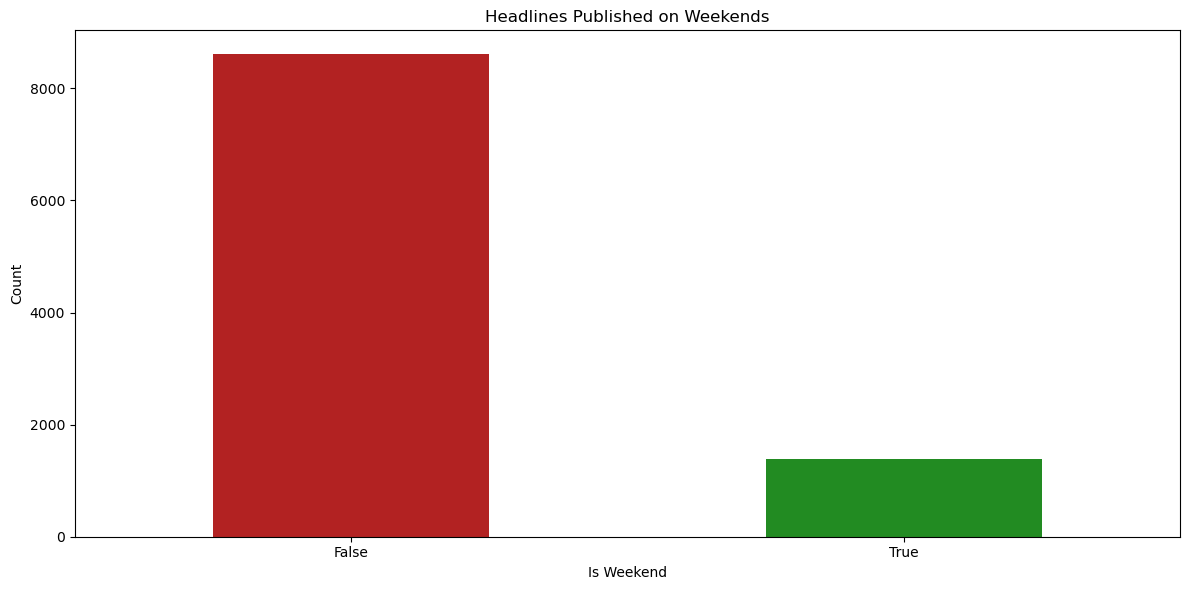

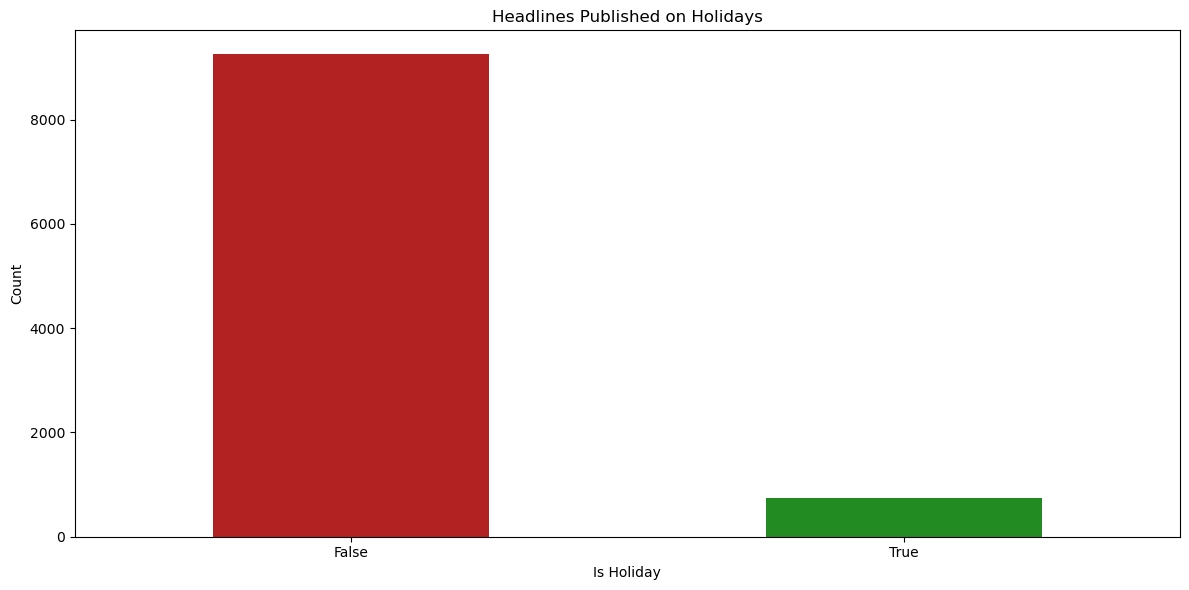

In [79]:
#Weekends
plt.figure(figsize=(12, 6))
weekend_df.plot(kind='bar', color=['firebrick', 'forestgreen'])
plt.title('Headlines Published on Weekends')
plt.xlabel('Is Weekend')
plt.ylabel('Count')
plt.xticks([0, 1], labels=['False', 'True'], rotation=0)
plt.savefig('weekend.jpg')
plt.tight_layout()
plt.show()
#Holidays
plt.figure(figsize=(12, 6))
holiday_df.plot(kind='bar', color=['firebrick', 'forestgreen'])
plt.title('Headlines Published on Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Count')
plt.xticks([0, 1], labels=['False', 'True'], rotation=0)
plt.savefig('holiday.jpg')
plt.tight_layout()
plt.show()